## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_statistics_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_statistics_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice
num_of_mice = mouse_statistics_df.count()
print(num_of_mice)

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
duplicates = mouse_statistics_df.pivot_table(index = ['Timepoint'], aggfunc ='size') 
duplicates

Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
dtype: int64

In [7]:
# Optional: Display all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
distinct_mice_df = mouse_statistics_df.drop_duplicates(subset = ["Mouse ID"])
distinct_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = distinct_mice_df.count()
unique_mice_count

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

print(mouse_statistics_df.mean())
print(mouse_statistics_df.median())
print(mouse_statistics_df.mode())
print(mouse_statistics_df.var(ddof = 0))
print(mouse_statistics_df.std(ddof = 0))


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Age_months            12.814580
Weight (g)            25.662441
Timepoint             19.572108
Tumor Volume (mm3)    50.448381
Metastatic Sites       1.021659
dtype: float64
Age_months            13.000000
Weight (g)            27.000000
Timepoint             20.000000
Tumor Volume (mm3)    48.951474
Metastatic Sites       1.000000
dtype: float64
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     g989    Capomulin  Male           8          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
Age_months             51.662925
Weight (g)             15.370998
Timepoint             198.126470
Tumor Volume (mm3)     79.074280
Metastatic Sites        1.294301
dtype: float64
Age_months             7.187693
Weight (g)             3.920586
Timepoint             14.075740
Tumor Volume (mm3)     8.892372
Metastatic Sites       1.137674
dtype: float64


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
print(mouse_statistics_df.mean())
print(mouse_statistics_df.median())
print(mouse_statistics_df.mode())
print(mouse_statistics_df.var(ddof = 0))
print(mouse_statistics_df.std(ddof = 0))


Age_months            12.814580
Weight (g)            25.662441
Timepoint             19.572108
Tumor Volume (mm3)    50.448381
Metastatic Sites       1.021659
dtype: float64
Age_months            13.000000
Weight (g)            27.000000
Timepoint             20.000000
Tumor Volume (mm3)    48.951474
Metastatic Sites       1.000000
dtype: float64
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     g989    Capomulin  Male           8          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
Age_months             51.662925
Weight (g)             15.370998
Timepoint             198.126470
Tumor Volume (mm3)     79.074280
Metastatic Sites        1.294301
dtype: float64
Age_months             7.187693
Weight (g)             3.920586
Timepoint             14.075740
Tumor Volume (mm3)     8.892372
Metastatic Sites       1.137674
dtype: float64


## Bar and Pie Charts

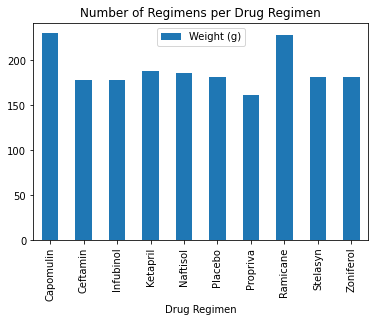

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_df = mouse_statistics_df[['Drug Regimen','Weight (g)']].groupby('Drug Regimen').count()
mice_df

mice_df.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Regimens per Drug Regimen")

plt.show()
plt.tight_layout()



In [13]:
mice_df

,Weight (g)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
#mice_df = mice_df.reset_index()
mice_df
regiment_nums = mice_df["Weight (g)"].values.tolist()
regiment_nums


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Converting index to list:


<BarContainer object of 10 artists>

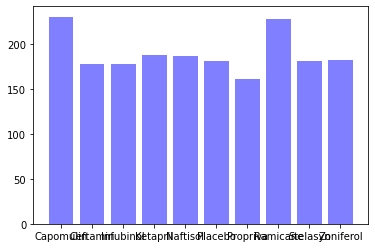

In [15]:
# Converting index column to list
index_list = mice_df.index.tolist()
  
print("Converting index to list:")
  
# display index as list
index_list

plt.bar(index_list, regiment_nums, color='b', alpha=0.5, align="center")

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Genders = ["Male", "Female"]
num_males = mouse_statistics_df[mouse_statistics_df["Sex"] == "Male"].count()
num_males
num_females = mouse_statistics_df[mouse_statistics_df["Sex"] == "Female"].count()
num_females
Gender_nums = [958, 935]
colours = ["Blue", "Red"]



(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

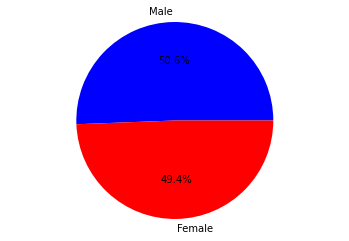

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(Gender_nums, labels = Genders, colors=colours, autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regiments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_statistics_df[mouse_statistics_df["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


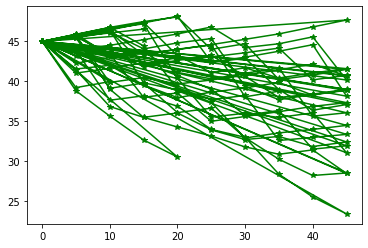

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumors = capomulin_df["Tumor Volume (mm3)"].values.tolist()
tumor_times = capomulin_df["Timepoint"].values.tolist()
tumor_line, = plt.plot(tumor_times, tumors, marker='*', color='green', label="Tumor Plots")

## Correlation and Regression

The correlation coefficient between the timestamps and tumor volumes is -0.31


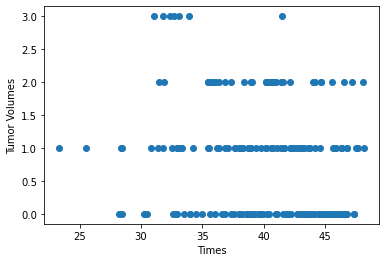

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
time_nums = capomulin_df.iloc[:, 6]
tumor_nums = capomulin_df.iloc[:, 7]
correlation = st.pearsonr(time_nums, tumor_nums)
plt.scatter(time_nums, tumor_nums)
plt.xlabel('Times')
plt.ylabel('Tumor Volumes')
print(f"The correlation coefficient between the timestamps and tumor volumes is {round(correlation[0],2)}")
plt.show()

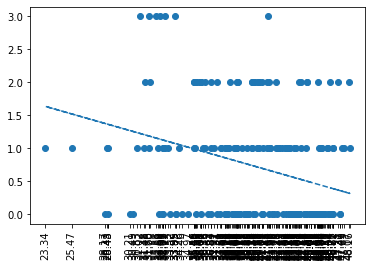

In [33]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(time_nums, tumor_nums)
vc_fit = vc_slope * time_nums + vc_int
plt.scatter(time_nums, tumor_nums)
plt.plot(time_nums,vc_fit,"--")
plt.xticks(time_nums, rotation=90)
plt.show()